# 2-Kmean图像聚类
## 案例：使用Kmeans对图片颜色进行聚类
### RGB图像：每个像素点值范围为0-255
### 数据集：bird_small.mat,bird_small.png

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
data = sio.loadmat('bird_small.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'A'])

In [3]:
A = data['A']
A.shape

(128, 128, 3)

In [4]:
def find_centroids(X,centros):
    """获取每个样本所属类别"""
    idx = []
    
    for i in range(len(X)):
        #（2，）-（k，2）->(k,2)->(k,)
        dist = np.linalg.norm((X[i] - centros),axis=1) #np.linalg.norm()取2范数
        id_i = np.argmin(dist) #取最小值的索引
        idx.append(id_i)
    
    return np.array(idx)

In [7]:
def compute_centros(X,idx,k):
    """计算聚类中心点"""
    centros = []
    
    for i in range(k):
        centros_i = np.mean(X[idx == i],axis=0)
        centros.append(centros_i)
        
    return np.array(centros)

In [8]:
def run_Kmeans(X,centros,iters):
    """Kmeans算法"""
    k = len(centros)
    centros_all = []
    centros_all.append(centros)
    centros_i = centros
    
    for i in range(iters):
        idx = find_centroids(X,centros_i)
        centros_i = compute_centros(X,idx,k)
        centros_all.append(centros_i)
        
    return idx,np.array(centros_all)

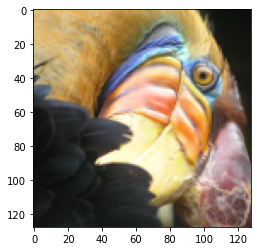

In [10]:
from skimage import io
image = io.imread('bird_small.png')
plt.imshow(image)

In [11]:
A = A / 255 #标准化
A = A.reshape(-1,3)

In [12]:
def init_centros(X,k):
    """初始化聚类点为随机样本点"""
    index = np.random.choice(len(X),k)
    return X[index]

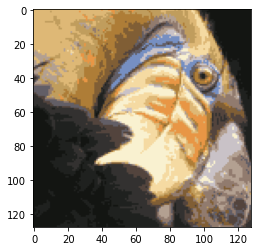

In [14]:
k = 16
idx,centros_all = run_Kmeans(A,init_centros(A,k=16),iters=20)
centros = centros_all[-1]
im = np.zeros(A.shape)

for i in range(k):
    im[idx==i] = centros[i]
im = im.reshape(128,128,3)
plt.imshow(im)